In [1]:
"""
分析步驟：
1. 讀取數據
2. 劃分特征變量和目標變量
3. 劃分數據集和訓練集
4. 模型訓練
5. 模型評估
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [2]:
# 讀取數據
df = pd.read_excel("客户信息及违约表现.xlsx")
df

,收入,年龄,性别,历史授信额度,历史违约次数,是否违约
0,503999,46,1,0,1,1
1,452766,36,0,13583,0,1
2,100000,33,1,0,1,1
3,100000,25,0,0,1,1
4,258000,35,1,0,0,1
...,...,...,...,...,...,...
995,510666,44,1,5000,0,0
996,490000,40,0,0,0,0
997,333333,44,1,10000,0,0
998,480000,38,1,0,0,0


In [3]:
# 劃分特征變量和目標變量

X = df.drop(columns="是否违约")
y = df["是否违约"]

In [4]:
# 划分数据集和測試集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [5]:
# 模型訓練
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [6]:
# 模型預測及評估
y_pred = clf.predict(X_test)
y_pred # 1是違約，0則是不違約

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1], dtype=int64)

In [7]:
# 查看模型預測準確率
score = accuracy_score(y_pred, y_test)
print(f"預測準確率：{score}")

預測準確率：0.795


In [8]:
# 違約概率&不違約概率
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba

array([[0.        , 1.        ],
       [0.57317073, 0.42682927],
       [0.        , 1.        ],
       [0.86123348, 0.13876652],
       [0.57317073, 0.42682927],
       [0.86123348, 0.13876652],
       [0.        , 1.        ],
       [0.86123348, 0.13876652],
       [0.86123348, 0.13876652],
       [0.86123348, 0.13876652],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.86123348, 0.13876652],
       [0.57317073, 0.42682927],
       [0.57317073, 0.42682927],
       [0.57317073, 0.42682927],
       [0.        , 1.        ],
       [0.86123348, 0.13876652],
       [0.86123348, 0.13876652],
       [0.125     , 0.875     ],
       [0.86123348, 0.13876652],
       [0.57317073, 0.42682927],
       [0.86123348, 0.13876652],
       [0.86123348, 0.13876652],
       [0.86123348, 0.13876652],
       [0.57317073, 0.42682927],
       [0.        , 1.        ],
       [0.86123348, 0.13876652],
       [0.86123348, 0.13876652],
       [0.

In [9]:
fpr,tpr,thres = roc_curve(y_test.values, y_pred_proba[:,1])

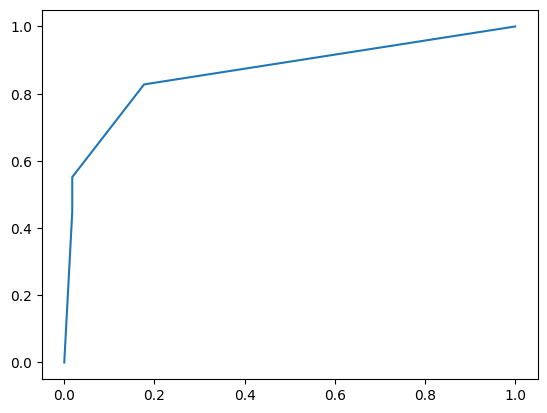

In [10]:
plt.plot(fpr, tpr)
plt.show()

In [11]:
auc_score = roc_auc_score(y_test.values, y_pred_proba[:,1])
print(f"AUC的值為:{auc_score}")

AUC的值為:0.8658834299664326
